### **1. the Big Picture**
**The main goal is to predict the median housing price in a California district based on various features (population, income, etc.).**

### **2. Frame the Problem**
##### **Housing Project Architecture**
| Property | Classification | Description |
| :--- | :---: | ---: |
| **Learning Type** | Supervised | The model is trained with labeled examples (median housing price). |
| **Task Type** | Regression | The goal is to predict a continuous numerical value. |
| **Feature Count** | Multiple Regression | The system uses multiple predictors (income, population, etc.). |
| **Output Count** | Univariate Regression | The system predicts only a single value per group of Blocks. |
| **Learning Mode** | Batch Learning | Data is static, fits in memory, and no continuous flow is required. |

### **3.Select a Performance Measure**

**1. Root Mean Square Error (RMSE)**
> RMSE is the preferred performance measure for regression tasks. It gives a higher weight to large errors (outliers), making it very sensitive to how well the model performs.
- Mathematical Formula:
    -  $$RMSE(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\mathbf{x}^{(i)}) - y^{(i)} \right)^2}$$
        - $m$: The number of instances in the dataset.
        -  $\mathbf{x}^{(i)}$: A vector of all feature values for the $i^{th}$ instance.
        - $y^{(i)}$: The actual label (the desired output value).
        - $h$: The system's prediction function (also called a hypothesis).
        - $RMSE$: The cost function measured on the set of examples using your hypothesis $h$.
- When to use it:
    - When you want to penalize large errors more heavily.
    - When the errors are expected to follow a Gaussian (normal) distribution.

**2. Mean Absolute Error (MAE)**
> MAE (also called the Average Absolute Deviation) is used if there are many outlier districts in your dataset. It measures the average magnitude of the errors in a set of predictions, without considering their direction.
- Mathematical Formula:
> $$MAE(\mathbf{X}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|$$
- When to use it:
    - When your dataset has many outliers (e.g., a few districts with extreme, rare pricing).
    - When you want a linear representation of error (an error of $10 is twice as bad as $5).

## **Get The Data**

### **Downoald The Data**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_housing = pd.read_csv("../Datasets/housing.csv")

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### **The Data Structure**

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


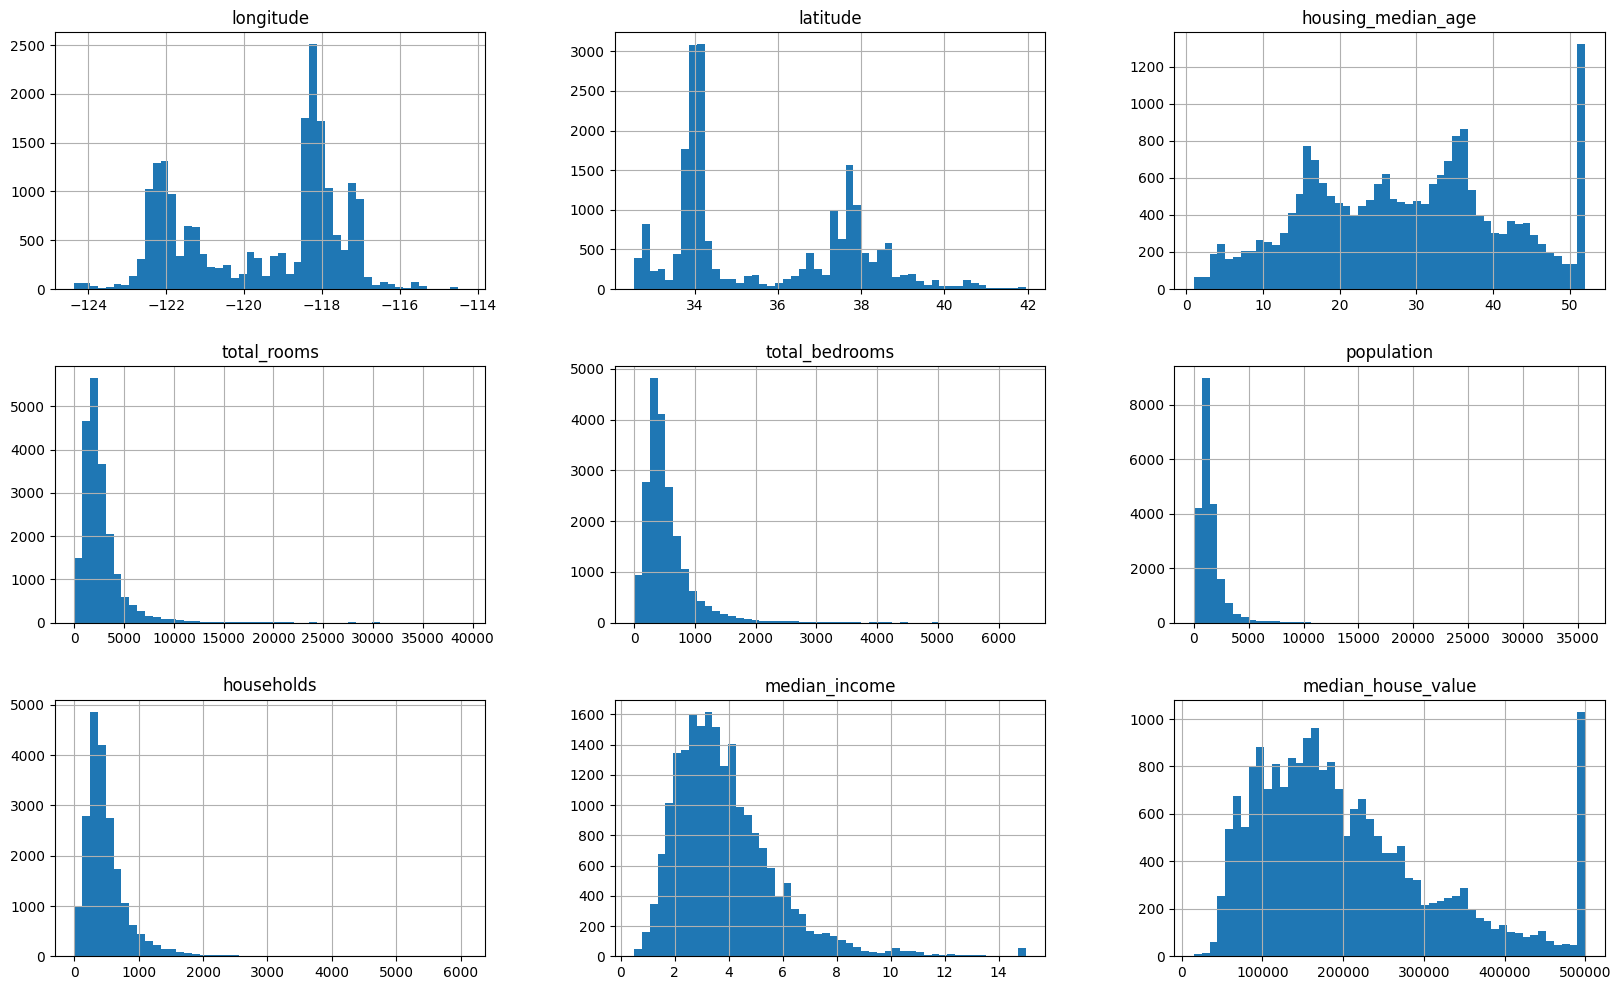

In [9]:
df_housing.hist(bins=50, figsize=(20, 12))

plt.show()

### **Create a Test Set**